In [231]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

results = {}

# Importing Data

In [232]:
# data_source_url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
# cols = ['airline_sentiment','text']
# data = pd.read_csv(data_source_url, usecols=cols)
# data.rename(columns = {'airline_sentiment':'emotion'}, inplace = True)

data_source_url = "isear.xlsx"
cols = ['SIT', 'Field1']
data = pd.read_excel(data_source_url, usecols=cols, engine='openpyxl')
data.rename(columns = {'Field1':'emotion', 'SIT':'text'}, inplace = True)

# data_source_url = "dataset/train.txt"
# data = pd.read_csv(data_source_url, header=None, sep=';', names=['text', 'emotion'], encoding='utf-8')
data.head()

,emotion,text
0,joy,"During the period of falling in love, each tim..."
1,fear,When I was involved in a traffic accident.
2,anger,When I was driving home after several days of...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I knocked a deer down - the sight of ...


In [233]:
data.describe()

,emotion,text
count,7666,7666
unique,7,7503
top,sadness,[ No response.]
freq,1096,77


<AxesSubplot:ylabel='emotion'>

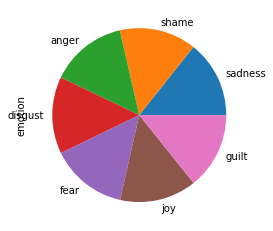

In [234]:
data['emotion'].value_counts().plot.pie()

# Preprocessing

In [235]:
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [236]:
def Toeknization(string):
    words=nltk.word_tokenize(string)
    return ' '.join(words)


def Removestopwords(string):
    for i in punctuation:
        string=string.replace(i,'')
    words=nltk.word_tokenize(string)
    k=[]
    eng_stop=stopwords.words('english')
    for each in words:
        if each not in eng_stop:
            k.append(each.lower())
    return ' '.join(k)


def Lammetization(string):
    words=nltk.word_tokenize(string)
    ws=WordNetLemmatizer()
    l=[]
    for each in words:
        l.append(ws.lemmatize(each))
    return ' '.join(l)

In [237]:
def Refine(string):
    return Lammetization(Removestopwords(Toeknization(string)))

In [238]:
data['processed_text']=data['text'].apply(lambda x: Refine(x))

In [239]:
data.head()

,emotion,text,processed_text
0,joy,"During the period of falling in love, each tim...",during period falling love time met á especial...
1,fear,When I was involved in a traffic accident.,when i involved traffic accident
2,anger,When I was driving home after several days of...,when i driving home several day hard work á mo...
3,sadness,When I lost the person who meant the most to me.,when i lost person meant
4,disgust,The time I knocked a deer down - the sight of ...,the time i knocked deer sight animal á injury ...


## Extra Column Adding (Numericals)

In [240]:
def GetPOSTags(string):
    words=nltk.word_tokenize(string)
    tags=nltk.pos_tag(words)
    return tags

In [241]:
def NounCount(string):
    ntg=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    for word,tag in ntg:
        if tag in allForms:
            count+=1
    return count
            
def PronounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['PRP','PRP$']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Verbs    
def VerbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adjectives    
def AdjectivesCount(string):
    POSTags=GetPOSTags(string)
    allForms=['JJ','JJR','JJS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adverbs    
def AdverbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['RB','RBR']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

In [242]:
# nltk.download('averaged_perceptron_tagger')
data['Noun_count']=data['processed_text'].apply(lambda x: NounCount(x))

In [243]:
data['ProNoun_count']=data['processed_text'].apply(lambda x: PronounsCount(x))

In [244]:
data['Verb_count']=data['processed_text'].apply(lambda x: VerbsCount(x))

In [245]:
data['Adjectives_count']=data['processed_text'].apply(lambda x: AdjectivesCount(x))

In [246]:
data['Adverbs_count']=data['processed_text'].apply(lambda x: AdverbsCount(x))

In [247]:
# Final dataset looks like
data.head()

,emotion,text,processed_text,Noun_count,ProNoun_count,Verb_count,Adjectives_count,Adverbs_count
0,joy,"During the period of falling in love, each tim...",during period falling love time met á especial...,4,0,3,2,1
1,fear,When I was involved in a traffic accident.,when i involved traffic accident,3,0,1,0,0
2,anger,When I was driving home after several days of...,when i driving home several day hard work á mo...,9,0,4,4,1
3,sadness,When I lost the person who meant the most to me.,when i lost person meant,3,0,1,0,0
4,disgust,The time I knocked a deer down - the sight of ...,the time i knocked deer sight animal á injury ...,13,0,4,1,1


# Global Variable

In [260]:
gb_num_words=1000
gb_output_dim=50
gb_epochs=30
gb_n_hidden_layers=25
gb_trainable=False
gd_dense = 7
gb_test_size=0.3
dataset_type = 'Dataset 3'

# Importing Wordembedding layers

In [261]:
con=open('glove.6B.50d.txt',encoding='utf-8')

In [262]:
index={}
for words in con:
    values=words.split()
    word=values[0]
    vect=np.asarray(values[1:],dtype='float32')
    index[word]=vect

In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [264]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
tokens=Tokenizer(num_words=gb_num_words)

# Using Embedding layers without numerical columns

In [265]:
from sklearn.model_selection import train_test_split

x=data['text']
y=data['emotion']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [266]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [267]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [268]:
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [269]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

# RNN Model 

## RNN Model without Numerical Columns

In [270]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [271]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 2s 7ms/step - loss: 2.0158 - accuracy: 0.1728 - val_loss: 1.9370 - val_accuracy: 0.1948
Epoch 2/30
168/168 [==============================] - 1s 7ms/step - loss: 1.9017 - accuracy: 0.2233 - val_loss: 1.8926 - val_accuracy: 0.2304
Epoch 3/30
168/168 [==============================] - 1s 5ms/step - loss: 1.8600 - accuracy: 0.2561 - val_loss: 1.8629 - val_accuracy: 0.2509
Epoch 4/30
168/168 [==============================] - 1s 5ms/step - loss: 1.8215 - accuracy: 0.2788 - val_loss: 1.8522 - val_accuracy: 0.2517
Epoch 5/30
168/168 [==============================] - 1s 6ms/step - loss: 1.7849 - accuracy: 0.2993 - val_loss: 1.8184 - val_accuracy: 0.2883
Epoch 6/30
168/168 [==============================] - 2s 9ms/step - loss: 1.7557 - accuracy: 0.3105 - val_loss: 1.7938 - val_accuracy: 0.3017
Epoch 7/30
168/168 [==============================] - 1s 7ms/step - loss: 1.7373 - accuracy: 0.3246 - val_loss: 1.7819 - val_accuracy: 0.2978
Epoch 

In [272]:
results_rnn=pd.DataFrame(model.history.history)
results_rnn

,loss,accuracy,val_loss,val_accuracy
0,2.015819,0.172754,1.937011,0.194783
1,1.901719,0.223258,1.892567,0.230435
2,1.860030,0.256057,1.862857,0.250870
3,1.821515,0.278792,1.852157,0.251739
4,1.784856,0.299292,1.818403,0.288261
5,1.755712,0.310473,1.793846,0.301739
6,1.737269,0.324637,1.781914,0.297826
7,1.720037,0.327246,1.828920,0.284783
8,1.715203,0.335259,1.793416,0.290435
9,1.705952,0.342900,1.765267,0.311739


In [273]:
results['RNN'] = results_rnn['val_accuracy'].mean()
results_rnn['val_accuracy'].mean()

0.3118840585152308

## RNN Model with Numerical Columns

In [274]:
l=['processed_text', 'ProNoun_count', 'Verb_count', 'Adjectives_count', 'Adverbs_count', 'Noun_count']

In [275]:
x=data[l]
y=data['emotion']

In [276]:
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [277]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [278]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [279]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [280]:
y_train.shape

(5366, 7)

In [281]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [282]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))

In [283]:
final_xtrain=np.hstack((x_train_text,x_train_num))

In [284]:
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))
final_xtest=np.hstack((x_test_text,x_test_num))

In [285]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [286]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 2s 6ms/step - loss: 1.9856 - accuracy: 0.1564 - val_loss: 1.9507 - val_accuracy: 0.1591
Epoch 2/30
168/168 [==============================] - 1s 5ms/step - loss: 1.9418 - accuracy: 0.1724 - val_loss: 1.9440 - val_accuracy: 0.1683
Epoch 3/30
168/168 [==============================] - 1s 5ms/step - loss: 1.9312 - accuracy: 0.1823 - val_loss: 1.9518 - val_accuracy: 0.1717
Epoch 4/30
168/168 [==============================] - 1s 5ms/step - loss: 1.9204 - accuracy: 0.1994 - val_loss: 1.9455 - val_accuracy: 0.1722
Epoch 5/30
168/168 [==============================] - 1s 5ms/step - loss: 1.9135 - accuracy: 0.2070 - val_loss: 1.9401 - val_accuracy: 0.1739
Epoch 6/30
168/168 [==============================] - 1s 5ms/step - loss: 1.9067 - accuracy: 0.2184 - val_loss: 1.9421 - val_accuracy: 0.1843
Epoch 7/30
168/168 [==============================] - 1s 5ms/step - loss: 1.8988 - accuracy: 0.2180 - val_loss: 1.9419 - val_accuracy: 0.1839
Epoch 

In [287]:
results_rnn_1=pd.DataFrame(model.history.history)
results_rnn_1

,loss,accuracy,val_loss,val_accuracy
0,1.985596,0.156355,1.950704,0.159130
1,1.941843,0.172382,1.944016,0.168261
2,1.931230,0.182259,1.951761,0.171739
3,1.920403,0.199404,1.945466,0.172174
4,1.913540,0.207044,1.940101,0.173913
5,1.906680,0.218412,1.942110,0.184348
6,1.898825,0.218040,1.941855,0.183913
7,1.892350,0.220835,1.942658,0.178696
8,1.886674,0.229780,1.938347,0.170870
9,1.881180,0.228289,1.945383,0.189565


In [288]:
results['RNN_1'] = results_rnn_1['val_accuracy'].mean()
results_rnn_1['val_accuracy'].mean()

0.18840579787890116

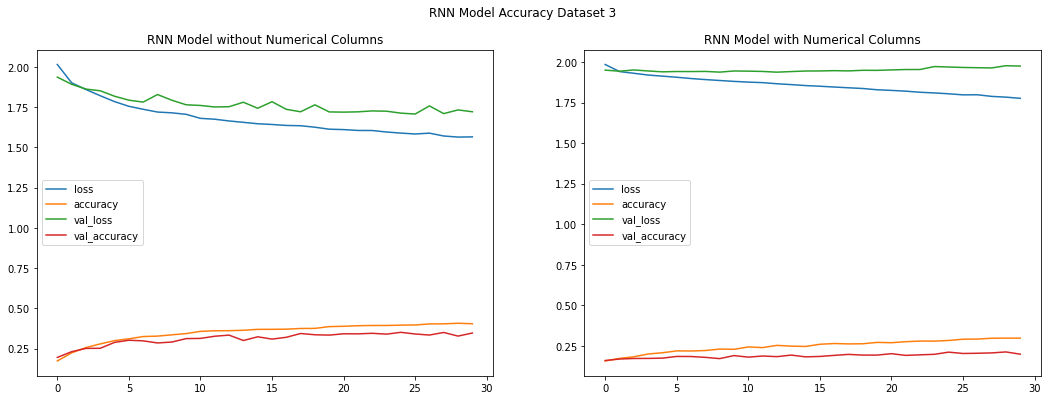

In [289]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('RNN Model Accuracy {}'.format(dataset_type))
ax1.plot(results_rnn)
ax1.set_title("RNN Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_rnn_1)
ax2.set_title("RNN Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# LSTM Model

## LSTM Model without Numerical Data

In [290]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [291]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [292]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [293]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [294]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [295]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 3s 9ms/step - loss: 1.9131 - accuracy: 0.2022 - val_loss: 1.8766 - val_accuracy: 0.2496
Epoch 2/30
168/168 [==============================] - 1s 6ms/step - loss: 1.8203 - accuracy: 0.2881 - val_loss: 1.7730 - val_accuracy: 0.3187
Epoch 3/30
168/168 [==============================] - 1s 6ms/step - loss: 1.7341 - accuracy: 0.3388 - val_loss: 1.7054 - val_accuracy: 0.3526
Epoch 4/30
168/168 [==============================] - 1s 7ms/step - loss: 1.6605 - accuracy: 0.3694 - val_loss: 1.6538 - val_accuracy: 0.3717
Epoch 5/30
168/168 [==============================] - 1s 7ms/step - loss: 1.6115 - accuracy: 0.3893 - val_loss: 1.6156 - val_accuracy: 0.3939
Epoch 6/30
168/168 [==============================] - 1s 7ms/step - loss: 1.5730 - accuracy: 0.4122 - val_loss: 1.5806 - val_accuracy: 0.4187
Epoch 7/30
168/168 [==============================] - 1s 6ms/step - loss: 1.5418 - accuracy: 0.4187 - val_loss: 1.5803 - val_accuracy: 0.4126
Epoch 

In [296]:
results_lstm=pd.DataFrame(model.history.history)
results_lstm

,loss,accuracy,val_loss,val_accuracy
0,1.913123,0.202199,1.876602,0.249565
1,1.820339,0.288110,1.773002,0.318696
2,1.734107,0.338800,1.705395,0.352609
3,1.660452,0.369363,1.653767,0.371739
4,1.611499,0.389303,1.615640,0.393913
5,1.572971,0.412225,1.580631,0.418696
6,1.541830,0.418748,1.580283,0.412609
7,1.518904,0.439433,1.576275,0.416087
8,1.480959,0.450988,1.574644,0.417391
9,1.461913,0.453224,1.551494,0.430000


In [297]:
results['LSTM'] = results_lstm['val_accuracy'].mean()
results_lstm['val_accuracy'].mean()

0.42995652059714

## LSTM Model with Numerical Data

In [298]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [299]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [300]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [301]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [302]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [303]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [304]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [305]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [306]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 3s 11ms/step - loss: 1.9485 - accuracy: 0.1482 - val_loss: 1.9427 - val_accuracy: 0.1674
Epoch 2/30
168/168 [==============================] - 2s 9ms/step - loss: 1.9339 - accuracy: 0.1752 - val_loss: 1.9309 - val_accuracy: 0.1817
Epoch 3/30
168/168 [==============================] - 2s 9ms/step - loss: 1.9115 - accuracy: 0.2097 - val_loss: 1.8964 - val_accuracy: 0.2191
Epoch 4/30
168/168 [==============================] - 2s 9ms/step - loss: 1.8701 - accuracy: 0.2467 - val_loss: 1.8551 - val_accuracy: 0.2657
Epoch 5/30
168/168 [==============================] - 2s 9ms/step - loss: 1.8253 - accuracy: 0.2760 - val_loss: 1.8198 - val_accuracy: 0.2770
Epoch 6/30
168/168 [==============================] - 2s 9ms/step - loss: 1.7891 - accuracy: 0.3049 - val_loss: 1.7999 - val_accuracy: 0.2926
Epoch 7/30
168/168 [==============================] - 2s 9ms/step - loss: 1.7535 - accuracy: 0.3217 - val_loss: 1.7750 - val_accuracy: 0.3057
Epoch

In [307]:
results_lstm_1=pd.DataFrame(model.history.history)
results_lstm_1

,loss,accuracy,val_loss,val_accuracy
0,1.948523,0.148155,1.942708,0.167391
1,1.933893,0.175177,1.930852,0.181739
2,1.911480,0.209653,1.896446,0.219130
3,1.870084,0.246739,1.855103,0.265652
4,1.825261,0.275997,1.819773,0.276957
5,1.789149,0.304883,1.799924,0.292609
6,1.753497,0.321655,1.774957,0.305652
7,1.722728,0.335445,1.770125,0.313913
8,1.690018,0.353709,1.793957,0.307391
9,1.660717,0.375699,1.727673,0.346522


In [308]:
results['LSTM_1'] = results_lstm_1['val_accuracy'].mean()
results_lstm_1['val_accuracy'].mean()

0.3358260909716288

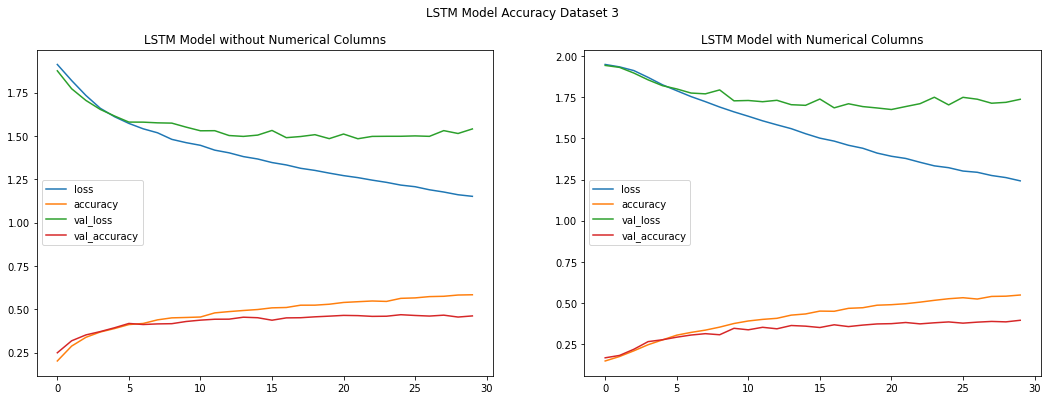

In [309]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('LSTM Model Accuracy {}'.format(dataset_type))
ax1.plot(results_lstm)
ax1.set_title("LSTM Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_lstm_1)
ax2.set_title("LSTM Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# Hybrid Model (LSTM + RNN)

## Hybrid Model without Numerical Data

In [310]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [311]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [312]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [313]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [314]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [315]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 6s 21ms/step - loss: 1.9378 - accuracy: 0.1899 - val_loss: 1.8921 - val_accuracy: 0.2383
Epoch 2/30
168/168 [==============================] - 3s 17ms/step - loss: 1.8278 - accuracy: 0.2725 - val_loss: 1.7883 - val_accuracy: 0.2943
Epoch 3/30
168/168 [==============================] - 3s 20ms/step - loss: 1.7345 - accuracy: 0.3239 - val_loss: 1.7074 - val_accuracy: 0.3474
Epoch 4/30
168/168 [==============================] - 4s 23ms/step - loss: 1.6698 - accuracy: 0.3653 - val_loss: 1.6667 - val_accuracy: 0.3622
Epoch 5/30
168/168 [==============================] - 4s 21ms/step - loss: 1.6287 - accuracy: 0.3846 - val_loss: 1.6383 - val_accuracy: 0.3713
Epoch 6/30
168/168 [==============================] - 2s 14ms/step - loss: 1.5859 - accuracy: 0.4061 - val_loss: 1.6241 - val_accuracy: 0.3739
Epoch 7/30
168/168 [==============================] - 3s 18ms/step - loss: 1.5458 - accuracy: 0.4201 - val_loss: 1.5873 - val_accuracy: 0.3935

In [316]:
results_hybrid=pd.DataFrame(model.history.history)
results_hybrid

,loss,accuracy,val_loss,val_accuracy
0,1.937810,0.189899,1.892132,0.238261
1,1.827830,0.272456,1.788299,0.294348
2,1.734459,0.323891,1.707421,0.347391
3,1.669764,0.365263,1.666681,0.362174
4,1.628692,0.384644,1.638298,0.371304
5,1.585913,0.406075,1.624119,0.373913
6,1.545801,0.420052,1.587287,0.393478
7,1.516647,0.434029,1.576253,0.413043
8,1.493823,0.449870,1.579246,0.405217
9,1.461245,0.462169,1.566447,0.410870


In [317]:
results['Hybrid'] = results_hybrid['val_accuracy'].mean()
results_hybrid['val_accuracy'].mean()

0.4125362316767375

## Hybrid Model with Numerical Data


In [318]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [319]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [320]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [321]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [322]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [323]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [324]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [325]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [326]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [327]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
168/168 [==============================] - 5s 16ms/step - loss: 1.9039 - accuracy: 0.2046 - val_loss: 1.8097 - val_accuracy: 0.2943
Epoch 2/30
168/168 [==============================] - 2s 11ms/step - loss: 1.7806 - accuracy: 0.2941 - val_loss: 1.7269 - val_accuracy: 0.3509
Epoch 3/30
168/168 [==============================] - 2s 11ms/step - loss: 1.6866 - accuracy: 0.3487 - val_loss: 1.6509 - val_accuracy: 0.3730
Epoch 4/30
168/168 [==============================] - 2s 12ms/step - loss: 1.6225 - accuracy: 0.3718 - val_loss: 1.5922 - val_accuracy: 0.3987
Epoch 5/30
168/168 [==============================] - 2s 12ms/step - loss: 1.5534 - accuracy: 0.4161 - val_loss: 1.5426 - val_accuracy: 0.4152
Epoch 6/30
168/168 [==============================] - 2s 12ms/step - loss: 1.5007 - accuracy: 0.4430 - val_loss: 1.5205 - val_accuracy: 0.4322
Epoch 7/30
168/168 [==============================] - 2s 12ms/step - loss: 1.4581 - accuracy: 0.4622 - val_loss: 1.5045 - val_accuracy: 0.4461

In [328]:
results_hybrid_1=pd.DataFrame(model.history.history)
results_hybrid_1

,loss,accuracy,val_loss,val_accuracy
0,1.903906,0.204622,1.809657,0.294348
1,1.780593,0.294074,1.726897,0.350870
2,1.686574,0.348677,1.650900,0.373043
3,1.622452,0.371785,1.592233,0.398696
4,1.553408,0.416139,1.542649,0.415217
5,1.500709,0.442974,1.520524,0.432174
6,1.458059,0.462169,1.504472,0.446087
7,1.421163,0.478196,1.487710,0.450870
8,1.378344,0.497950,1.482313,0.458261
9,1.353657,0.507082,1.495080,0.457391


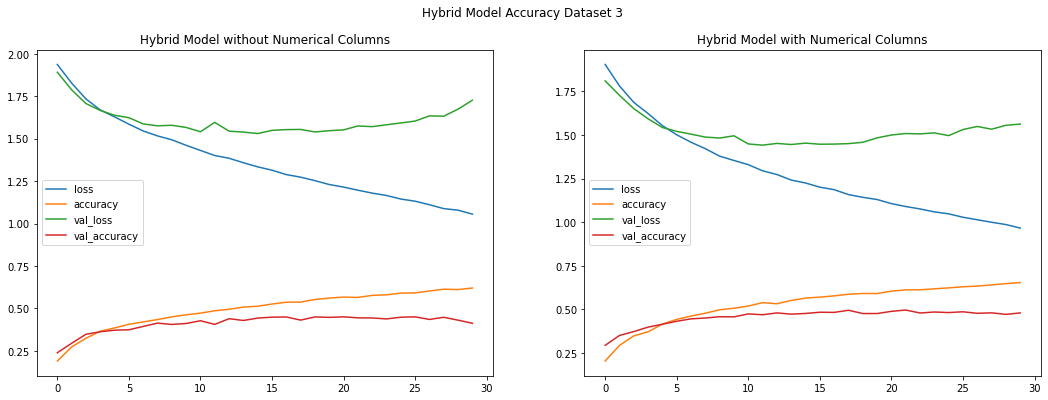

In [329]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
ax1.plot(results_hybrid)
ax1.set_title("Hybrid Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_hybrid_1)
ax2.set_title("Hybrid Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

In [330]:
results['Hybrid_1'] = results_hybrid_1['val_accuracy'].mean()
results_hybrid_1['val_accuracy'].mean()

0.45650724371274315

# Results of all models

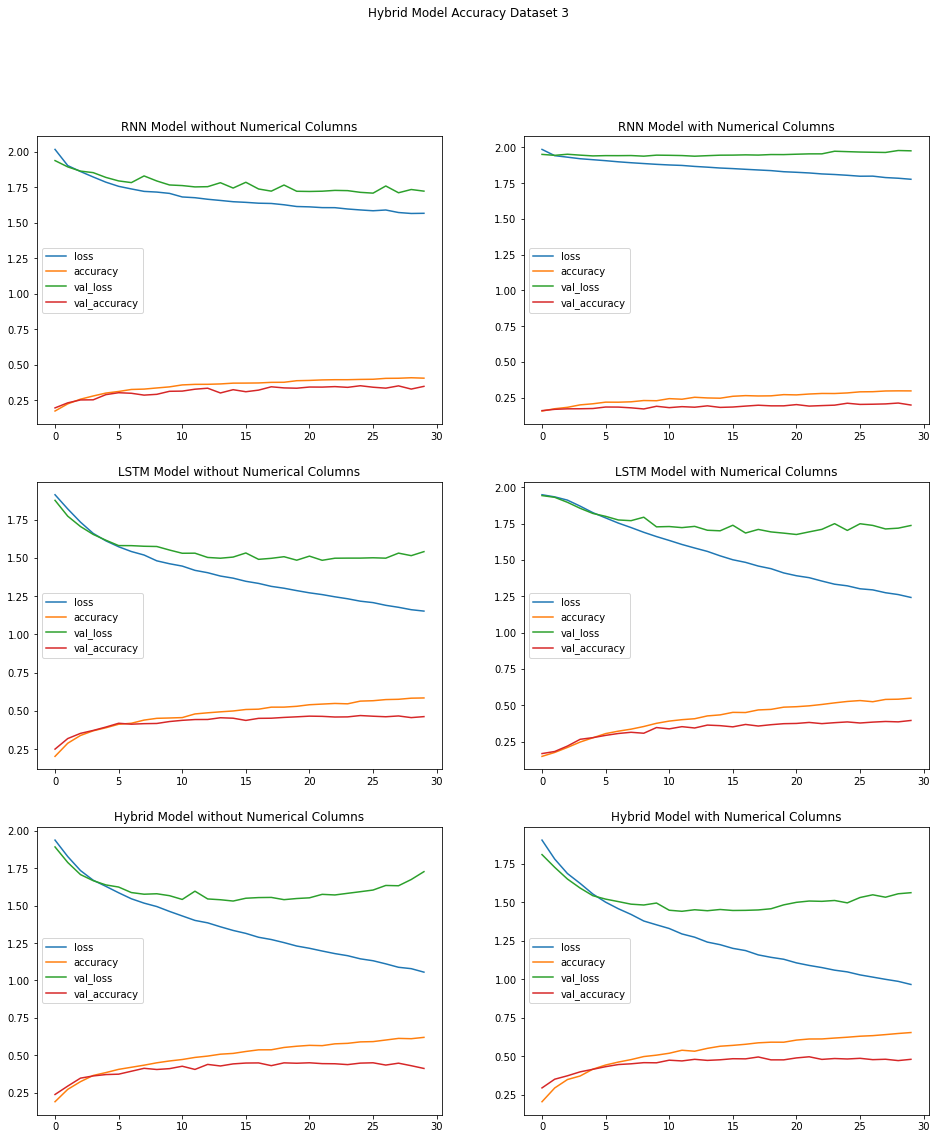

In [331]:
fig, axis = plt.pyplot.subplots(3, 2, figsize=(16, 18))

# fig.suptitle('Model Accuracy')
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
axis[0, 0].plot(results_rnn)
axis[0, 0].set_title("RNN Model without Numerical Columns")
axis[0, 0].legend(results_rnn.columns.values, loc='center left')
axis[0, 1].plot(results_rnn_1)
axis[0, 1].set_title("RNN Model with Numerical Columns")
axis[0, 1].legend(results_rnn.columns.values, loc='center left')
axis[1, 0].plot(results_lstm)
axis[1, 0].set_title("LSTM Model without Numerical Columns")
axis[1, 0].legend(results_rnn.columns.values, loc='center left')
axis[1, 1].plot(results_lstm_1)
axis[1, 1].set_title("LSTM Model with Numerical Columns")
axis[1, 1].legend(results_rnn.columns.values, loc='center left')
axis[2, 0].plot(results_hybrid)
axis[2, 0].set_title("Hybrid Model without Numerical Columns")
axis[2, 0].legend(results_rnn.columns.values, loc='center left')
axis[2, 1].plot(results_hybrid_1)
axis[2, 1].set_title("Hybrid Model with Numerical Columns")
axis[2, 1].legend(results_rnn.columns.values, loc='center left')

In [332]:
print("Number of Words -", gb_num_words ," | Epochs - ", gb_epochs ," | Hidden Layer - ",gb_n_hidden_layers)
print("Dataset - ", data_source_url)
print("RNN")
print(results_rnn[-1:])
print("RNN_1")
print(results_rnn_1[-1:])
print("LSTM")
print(results_lstm[-1:])
print("LSTM_1")
print(results_lstm_1[-1:])
print("Hybrid")
print(results_hybrid[-1:])
print("Hybrid_1")
print(results_hybrid_1[-1:])

Number of Words - 1000  | Epochs -  30  | Hidden Layer -  25
Dataset -  isear.xlsx
RNN
        loss  accuracy  val_loss  val_accuracy
29  1.565692  0.404212   1.72179      0.346522
RNN_1
        loss  accuracy  val_loss  val_accuracy
29  1.776786  0.297056  1.975631      0.198261
LSTM
        loss  accuracy  val_loss  val_accuracy
29  1.152248  0.584234  1.541125      0.462174
LSTM_1
        loss  accuracy  val_loss  val_accuracy
29  1.241809   0.54864   1.73704      0.395217
Hybrid
        loss  accuracy  val_loss  val_accuracy
29  1.055551  0.619829  1.726991      0.412174
Hybrid_1
       loss  accuracy  val_loss  val_accuracy
29  0.96617  0.653932  1.562265          0.48


In [333]:
for key in results:
    print(key, '->', results[key])

RNN -> 0.3118840585152308
RNN_1 -> 0.18840579787890116
LSTM -> 0.42995652059714
LSTM_1 -> 0.3358260909716288
Hybrid -> 0.4125362316767375
Hybrid_1 -> 0.45650724371274315


In [334]:
# https://www.javacodemonk.com/difference-between-loss-accuracy-validation-loss-validation-accuracy-in-keras-ff358faa

In [335]:
import tensorflow as tf
print(tf.__version__)

2.5.0
